<a href="https://colab.research.google.com/github/NidhiSingh25901/DeepLearningWithPytorchFundamentals/blob/main/SimpleNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
class Model(nn.Module):
  #Input layer (4 features of the floor) --> Hidden layer 1 (number of neuron) --> H2 (n) --> output (3 classes of iris flowers)
  def __init__(self, in_features=4,h1=8,h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x

#Pick a random seed for randomization
torch.manual_seed(41)

#Create an instance of model
model = Model()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [17]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

/tmp/ipython-input-371369917.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


In [18]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#Train Test Split ! Set X, y

X = my_df.drop('variety', axis=1)
y = my_df['variety']

#Convert this to numpy arrays
X = X.values
y = y.values

#Train test split
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=41)

In [23]:
#Convert X features and y features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)



In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [25]:
#Train our model
#Epochs ? one run thr all the training data in our network

epochs = 100
losses =[]
for i in range(epochs):
  y_pred = model.forward(X_train)

  #Measure the loss /error, gonna be high at first
  loss = criterion(y_pred, y_train)
  losses.append(loss)

  if i%10==0:
    print(f'Epoch: {i} and loss: {loss}')

  #Do some back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347674369812
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349585056305
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651507973671
Epoch: 90 and loss: 0.06522614508867264


Text(0.5, 0, 'epoch')

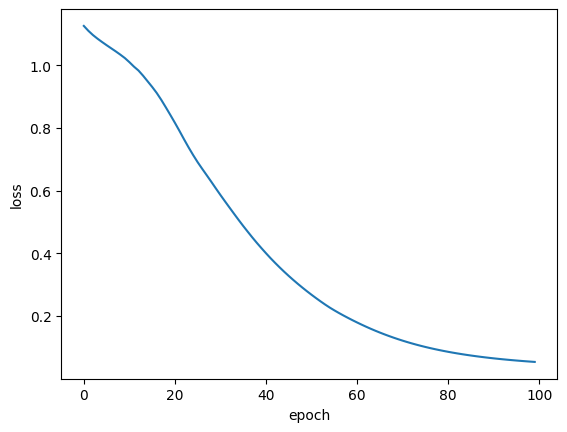

In [28]:
plt.plot(range(epochs), [loss.detach().numpy() for loss in losses])
plt.ylabel("loss")
plt.xlabel("epoch")